### Importing relevant libraries and functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#### Import train and test split dataset

In [2]:
featuretrain_X = pd.read_csv('features_train.csv')
featuretest_X = pd.read_csv('features_test.csv')
targettrain_y = pd.read_csv('target_train.csv').squeeze()  # Convert DataFrame to Series if single column
targettest_y = pd.read_csv('target_test.csv').squeeze()

**Train various models and observing how they do**

In [9]:
# Define a dictionary of models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine': SVC(kernel='linear'),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Random Forest': RandomForestClassifier(),
}

In [10]:
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(featuretrain_X, targettrain_y)
    predictions = model.predict(featuretest_X)
    
    # Evaluate the model
    accuracy = accuracy_score(targettest_y, predictions)
    precision = precision_score(targettest_y, predictions, average='weighted', zero_division=0)
    recall = recall_score(targettest_y, predictions, average='weighted', zero_division=0)
    f1 = f1_score(targettest_y, predictions, average='weighted', zero_division=0)
    
    # Store the results
    results[name] = {
        'Accuracy': accuracy,  # Store as decimal
        'Precision': precision,  # Store as decimal
        'Recall': recall,  # Store as decimal
        'F1 Score': f1,  # Store as decimal
    }

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).transpose()
results_df.sort_values(by='F1 Score', ascending=False, inplace=True)

# Print the results as raw values
print(results_df)

                        Accuracy  Precision    Recall  F1 Score
Random Forest           0.799043   0.784689  0.799043  0.788734
Logistic Regression     0.803828   0.773913  0.803828  0.780764
Gradient Boosting       0.775120   0.765529  0.775120  0.765996
Support Vector Machine  0.808612   0.758641  0.808612  0.749406
Decision Tree           0.626794   0.718779  0.626794  0.665112


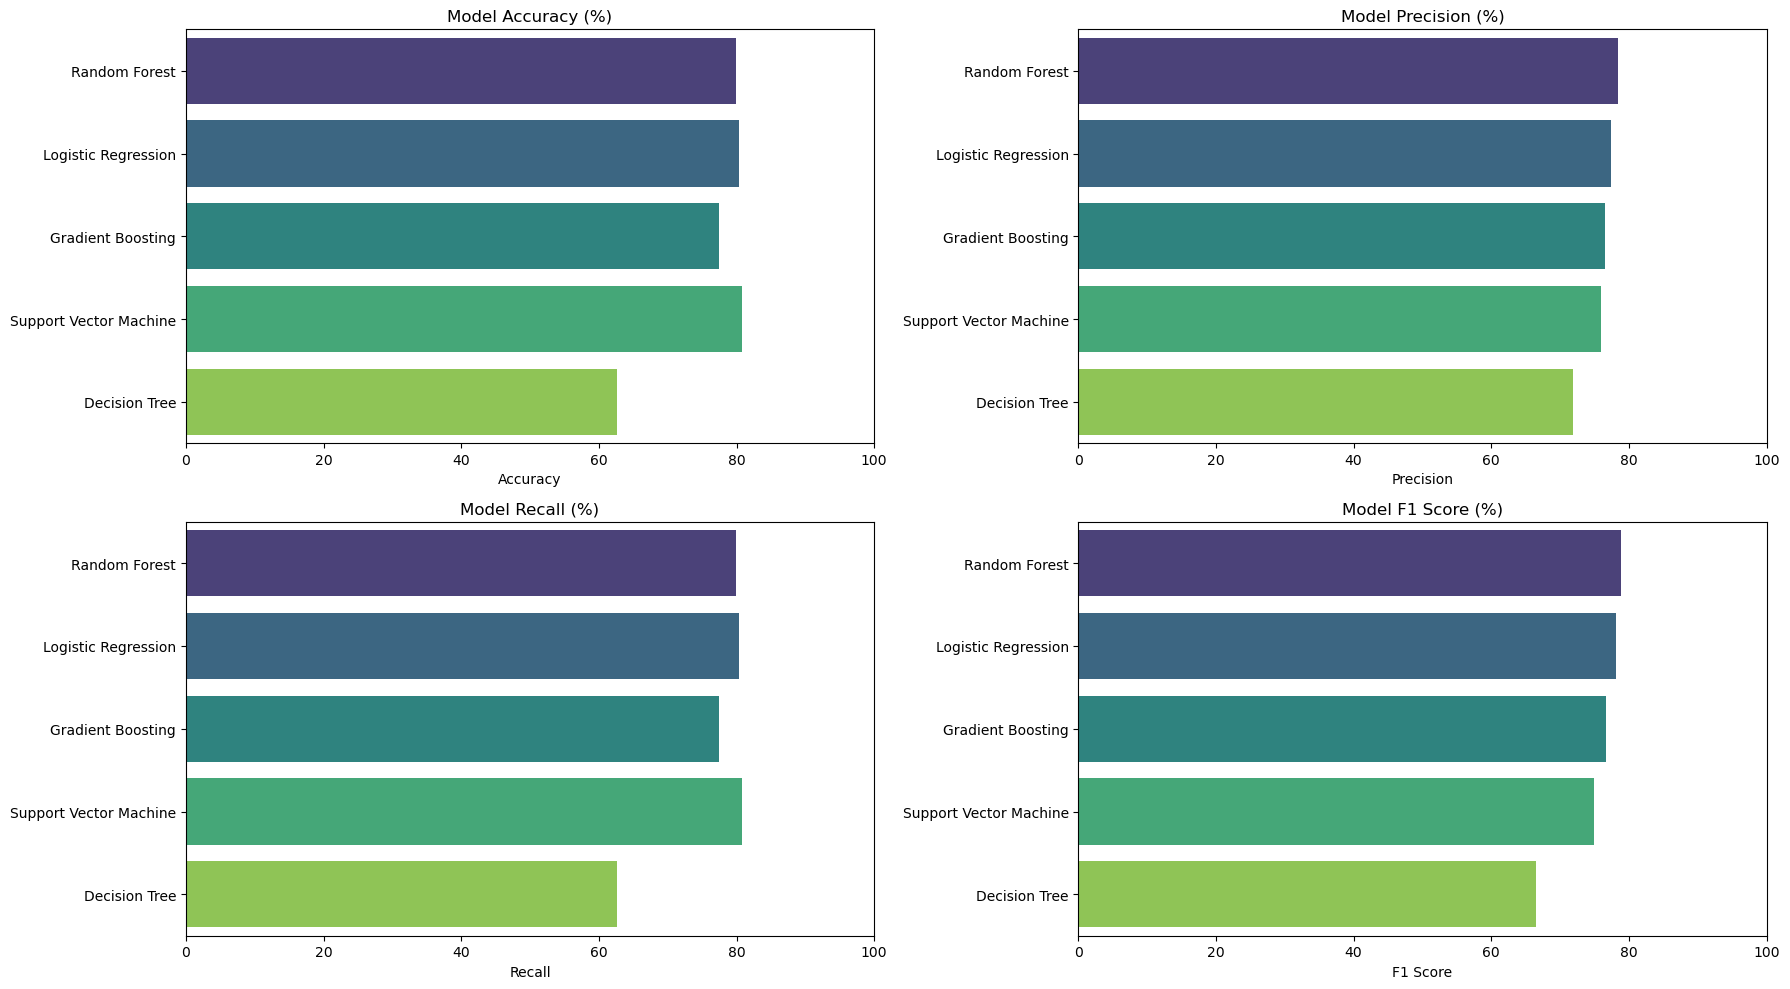

In [11]:
# Convert results to percentages for plotting
results_df_percent = results_df * 100  # Convert to percentages

# Plotting the results
fig, ax = plt.subplots(2, 2, figsize=(18, 10))
sns.barplot(x='Accuracy', y=results_df_percent.index, data=results_df_percent, ax=ax[0, 0], palette='viridis')
ax[0, 0].set_title('Model Accuracy (%)')
ax[0, 0].set_xlim([0, 100])  # Ensure x-axis goes from 0 to 100%

sns.barplot(x='Precision', y=results_df_percent.index, data=results_df_percent, ax=ax[0, 1], palette='viridis')
ax[0, 1].set_title('Model Precision (%)')
ax[0, 1].set_xlim([0, 100])

sns.barplot(x='Recall', y=results_df_percent.index, data=results_df_percent, ax=ax[1, 0], palette='viridis')
ax[1, 0].set_title('Model Recall (%)')
ax[1, 0].set_xlim([0, 100])

sns.barplot(x='F1 Score', y=results_df_percent.index, data=results_df_percent, ax=ax[1, 1], palette='viridis')
ax[1, 1].set_title('Model F1 Score (%)')
ax[1, 1].set_xlim([0, 100])

plt.tight_layout()
plt.show()

In [12]:
# results_df is defined and contains Accuracy, Precision, Recall, F1 Score for each model
# Sort the models based on F1 Score in descending order
top_models_df = results_df.sort_values(by='F1 Score', ascending=False).head(3)

# Print the top 3 models and their metrics
print("Top 3 Models based on F1 Score:")
print(top_models_df)

Top 3 Models based on F1 Score:
                     Accuracy  Precision    Recall  F1 Score
Random Forest        0.799043   0.784689  0.799043  0.788734
Logistic Regression  0.803828   0.773913  0.803828  0.780764
Gradient Boosting    0.775120   0.765529  0.775120  0.765996


**As these 3 models seem to yield the best results, we will adopt these models.**